100%|██████████| 100/100 [00:00<00:00, 862.66it/s]

Accuracy: 99.0
Mean episode length: 74.02
Last reward processor:
Estimated confusion matrix:


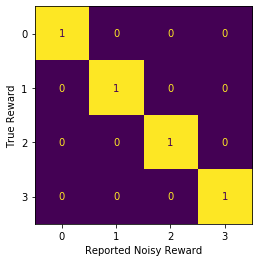

Reward sets:
(0, 0): [-2, -3, -3]
(0, 1): [-2, 0, -2, -2]
(0, 2): [0, 0, -2, -1, -1, 0, -1, 0, -1, -1]
(0, 3): [0, 0, 0, 0, 0, -2, 0, 0, 0, -1, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, -2, -1, 0, 0, 0, 0, 0, -1, -1, 0, -1, 0, 0, 0, -1, -1, 0, -2, -1, -2, 0, -1, -1, 0, 0, -1, 0]
(0, 4): [-3, -1, -2]
(0, 5): [-3, -2]
(0, 6): [-3, -3, -3]
Reward set counts:
Key (0, 0): 3 items
Key (0, 1): 4 items
Key (0, 2): 10 items
Key (0, 3): 49 items
Key (0, 4): 3 items
Key (0, 5): 2 items
Key (0, 6): 3 items


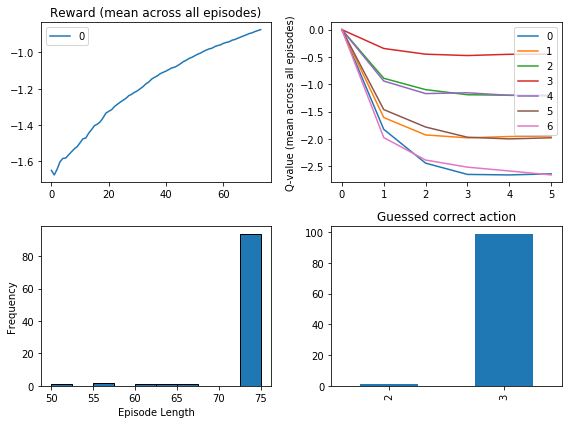

array([-2.640817, -1.947816, -1.215117, -0.447464, -1.198762, -1.98007 ,
       -2.661046])

In [1]:
import utils
from utils import *
from thompson_sampling_agent import ThompsonSamplingAgentTemporaryWrapper

params_new = {
    'max_steps': 75,
    'correct_action': 3,
    # # Runner parameters
    # 'max_steps': 1000,
    'num_episodes': 100,
    # 'convergence_consecutive_limit': 30,
    #
    'agent': ThompsonSamplingAgentTemporaryWrapper,    
    }

params = default_params() | params_new
plot_mean_q_values(params=params)

# Mean reward might awkwardly drop, because most of the episodes end early

100%|██████████| 1000/1000 [00:02<00:00, 496.16it/s]


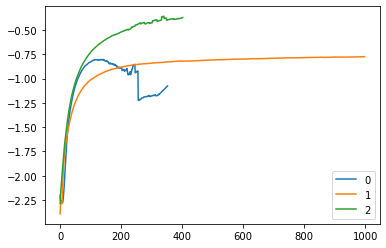

In [3]:
rewards = []

params_new = {
    # # Runner parameters
    'max_steps': 1000,
    'num_episodes': 1000,
    }

params = default_params() | params_new

from ucbq_agent_stateless import UCBQAgent

params['surrogate'] = True
params['agent'] = UCBQAgent
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
rewards.append(rewards_all_experiments)

params = optimized_params | params_new
params['surrogate'] = True
params['agent'] = UCBQAgent
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
rewards.append(rewards_all_experiments)

params = default_params() | params_new
params['surrogate'] = False
params['agent'] = ThompsonSamplingAgentTemporaryWrapper
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
rewards.append(rewards_all_experiments)


# Beware, VS Code variable inspector can show wrong Size value

# Apply get_mean_rewards_across_episodes to each element in rewards
mean_rewards = [get_mean_rewards_across_episodes(rewards_all_experiments) for rewards_all_experiments in rewards]

pd.DataFrame(mean_rewards).T.plot()